Working from Git repository heads/master-0-gc70880b



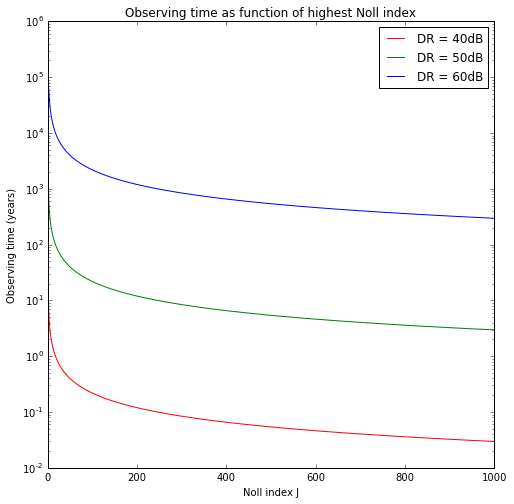

In [9]:
%matplotlib inline

from telopt import *
import numpy
import pylab
pylab.rcParams['figure.figsize'] = (8.0, 8.0)

import subprocess
print "Working from Git repository %s" % subprocess.check_output(["git",  "describe", "--long", "--all"])

class TelIono:
    def _init_(self):
        self.hiono=300
    
    def ionosphere(self, baseline):
        return numpy.power(baseline/14.0,+1.8/2.0)/1.5
        
    def DR(self, J, r0=14.0, B=80.0, tobs=10000.*3600.0, tiono=10.0):
        return 3.397 * numpy.power(J, math.sqrt(3)/4.0) * numpy.power(B/r0, -5.0/6.0) * numpy.sqrt(tobs/tiono)
        
    def tobs(self, J, DR=1e5, r0=14.0, B=80.0, tobs=10000.*3600.0, tiono=10.0):
        return tiono * (DR/3.397)**2 * numpy.power(J, -math.sqrt(3)/2.0) * numpy.power(B/r0, 5.0/6.0)


J=numpy.arange(1.0,1000.0)
tobs=TelIono().tobs(J,DR=1e4)/(365.0*24.0*3600.0)
plt.semilogy(J,tobs, color='r', label='DR = 40dB')

tobs=TelIono().tobs(J,DR=1e5)/(365.0*24.0*3600.0)
plt.semilogy(J,tobs, color='g', label='DR = 50dB')

tobs=TelIono().tobs(J,DR=1e6)/(365.0*24.0*3600.0)
plt.semilogy(J,tobs, color='b', label='DR = 60dB')

plt.xlabel('Noll index J')
plt.ylabel('Observing time (years)')
plt.title('Observing time as function of highest Noll index')

plt.legend()

plt.show()